#Ballon Segmentation



Before squeezing: TensorShape([1, None, 1, 1, 1024])
After squeezing: (1, None, 1024)
TensorShape([1, None, 8])


2023-10-24 13:43:44.936398: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "CropAndResize" attr { key: "T" value { type: DT_FLOAT } } attr { key: "extrapolation_value" value { f: 0 } } attr { key: "method" value { s: "bilinear" } } inputs { dtype: DT_FLOAT shape { dim { size: -50 } dim { size: 256 } dim { size: 256 } dim { size: 256 } } } inputs { dtype: DT_FLOAT shape { dim { size: -19 } dim { size: 4 } } } inputs { dtype: DT_INT32 shape { dim { size: -19 } } } inputs { dtype: DT_INT32 shape { dim { size: 2 } } value { dtype: DT_INT32 tensor_shape { dim { size: 2 } } int_val: 7 } } device { type: "CPU" vendor: "GenuineIntel" model: "111" frequency: 2599 num_cores: 40 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 32768 l2_cache_size: 262144 l3_cache_size: 26214400 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { 

Dynamic Shape of probs: [5 2]


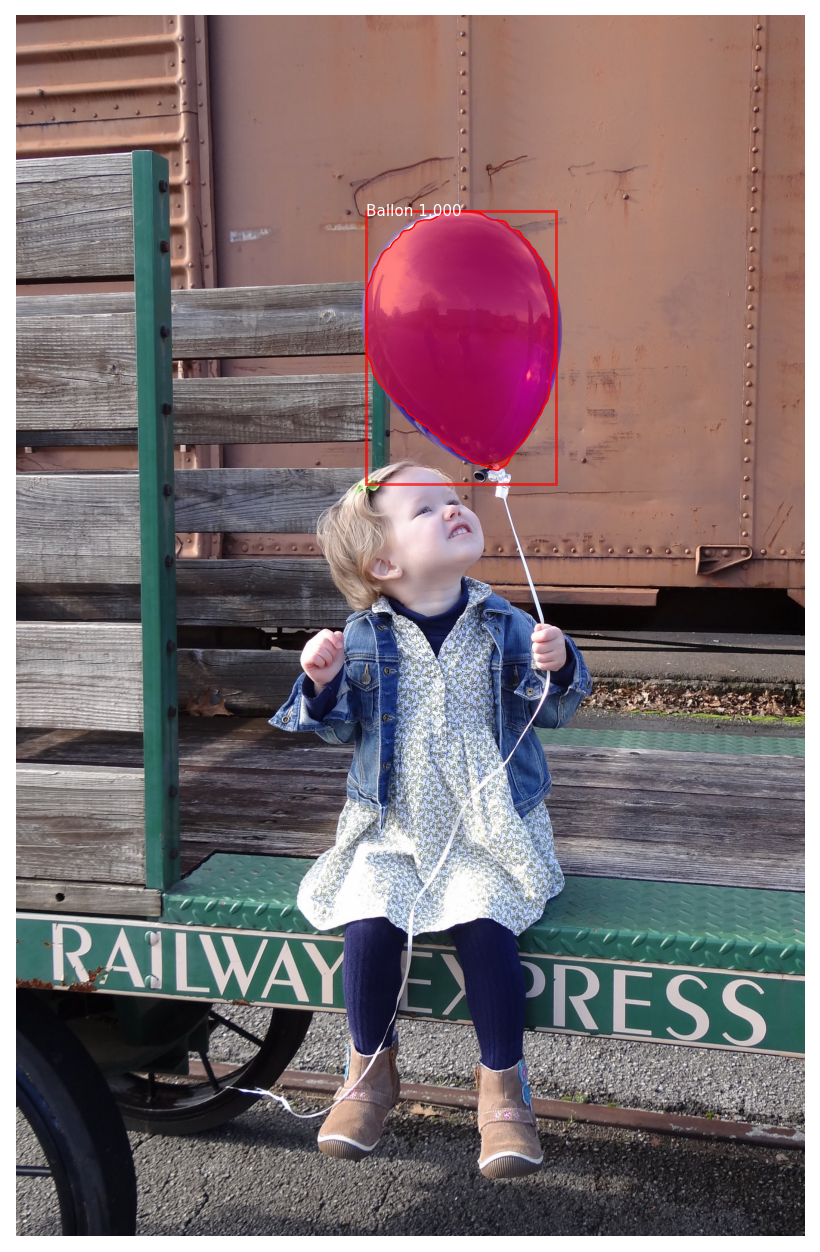

In [11]:
import mrcnn
import mrcnn.config
import mrcnn.model
import mrcnn.visualize
import cv2
import os
import numpy

# load the class label names from disk, one label per line
# CLASS_NAMES = open("coco_labels.txt").read().strip().split("\n")

CLASS_NAMES1 = ['background','Ballon']
POST_NMS_ROIS_INFERENCE = 5

REGION_PROPOSALS = numpy.zeros(shape=(1, POST_NMS_ROIS_INFERENCE, 4), dtype=numpy.float32)

# REGION_PROPOSALS[0, 0, :] = [0.0,  0.0 ,  0.2,   0.3]
# REGION_PROPOSALS[0, 1, :] = [0.42, 0.02,  0.8,   0.267]
# REGION_PROPOSALS[0, 2, :] = [0.12, 0.52,  0.55,  0.84]
# REGION_PROPOSALS[0, 3, :] = [0.61, 0.71,  0.87,  0.21]
# REGION_PROPOSALS[0, 4, :] = [0.074, 0.83, 0.212, 0.94]

REGION_PROPOSALS[0, 0, :] = [0.49552074, 0.        , 0.53763664, 0.09105143]
REGION_PROPOSALS[0, 1, :] = [0.5294977 , 0.39210293, 0.63644147, 0.44242138]
REGION_PROPOSALS[0, 2, :] = [0.36204672, 0.40500385, 0.6706183 , 0.54514766]
REGION_PROPOSALS[0, 3, :] = [0.48107424, 0.08110721, 0.51513755, 0.17086479]
REGION_PROPOSALS[0, 4, :] = [0.45803332, 0.15717855, 0.4798005 , 0.20352092]

class SimpleConfig(mrcnn.config.Config):
    # Give the configuration a recognizable name
    NAME = "balloons"
    # set the number of GPUs to use along with the number of images per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
	# Number of classes = number of classes + 1 (+1 for the background). The background class is named BG
    NUM_CLASSES = 2
    POST_NMS_ROIS_INFERENCE = POST_NMS_ROIS_INFERENCE
    # If REGION_PROPOSALS is None, then the region proposals are produced by the RPN.
    # Otherwise, the user-defined region proposals are used.
    REGION_PROPOSALS = REGION_PROPOSALS
    # REGION_PROPOSALS = None

# Initialize the Mask R-CNN model for inference and then load the weights.
# This step builds the Keras model architecture.
model = mrcnn.model.MaskRCNN(mode="inference", 
                                              config=SimpleConfig(),
                                              model_dir=os.getcwd())

# Load the weights into the model.
model.load_weights(filepath="mask_rcnn_balloon.h5", 
                   by_name=True)

# load the input image, convert it from BGR to RGB channel
image = cv2.imread("24631331976_defa3bb61f_k.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform a forward pass of the network to obtain the results
r = model.detect([image])

# Get the results for the first image.
r = r[0]

# Visualize the detected objects.
mrcnn.visualize.display_instances(image=image, 
                                           boxes=r['rois'], 
                                           masks=r['masks'], 
                                           class_ids=r['class_ids'], 
                                           class_names=CLASS_NAMES1, 
                                           scores=r['scores'])


In [12]:
!python3 balloon.py -splash --image 24631331976_defa3bb61f_k.jpg

2023-10-24 15:50:44.943767: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/lemoi18/.local/lib/python3.10/site-packages/cv2/../../lib64:
usage: balloon.py [-h] [--dataset /path/to/balloon/dataset/] --weights
                  /path/to/weights.h5 [--logs /path/to/logs/]
                  [--image path or URL to image]
                  [--video path or URL to video]
                  <command>
balloon.py: error: the following arguments are required: <command>, --weights
